# resnet50


In [ ]:
!git clone https://github.com/bochendong/few_shot_classification.git

Cloning into 'few_shot_classification'...
remote: Enumerating objects: 13216, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 13216 (delta 31), reused 47 (delta 17), pack-reused 13152 (from 1)
Receiving objects: 100% (13216/13216), 437.31 MiB | 14.95 MiB/s, done.
Resolving deltas: 100% (487/487), done.
Updating files: 100% (29045/29045), done.


In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models

In [ ]:
# Data paths
train_dir = '/content/few_shot_classification/code/train'
val_dir = '/content/few_shot_classification/code/val'

# Data transformations (image preprocessing)
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),          # Resize image dimensions
    # transforms.RandomHorizontalFlip(),         # Random horizontal flip
    # transforms.RandomRotation(10),             # Random rotation (angle range: -15 to 15 degrees)
    # transforms.RandomCrop(120),               # Randomly crop part of the image (120x120)
    # transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),  # Random resized crop
    # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation (10%)
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5), # Random perspective distortion
    # transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)), # Gaussian blur
    transforms.ToTensor(),                  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),          # Resize image dimensions
    transforms.ToTensor(),                  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load data using ImageFolder
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_transforms)

# Check the number of classes
print(len(train_dataset.classes))
print(train_dataset.classes)  # Print the list of class names

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

150
['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking',

In [ ]:
# GPU setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available; otherwise, fallback to CPU

# Load and modify the ResNet-50 model
resnet50 = models.resnet50(pretrained=False)  # Load the ResNet-50 model

# Number of output classes
num_classes = 150  # Define the number of classes in the dataset

# Modify the fully connected (fc) layer of ResNet-50
# The original fc layer outputs 1,000 classes (ImageNet), so replace it with a new layer
resnet50.fc = nn.Linear(resnet50.fc.in_features, num_classes)  # Update the fc layer for 150 classes



resnet50 = resnet50.to(device)  # Move the model to the selected device (GPU or CPU)

# Define the loss function
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is used for multi-class classification tasks

# Define the optimizer
optimizer = optim.Adam(resnet50.parameters(), lr=0.001)  # Adam optimizer with a learning rate of 0.001

# Training and validation loop
num_epochs = 50  # Set the number of training epochs

In [ ]:
import matplotlib.pyplot as plt

# Lists to store accuracy and loss values during training
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    resnet50.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = resnet50(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total

    # Validation phase
    resnet50.eval()
    valid_loss = 0.0
    valid_correct = 0
    valid_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = resnet50(images)
            loss = criterion(outputs, labels)

            valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted == labels).sum().item()

    valid_accuracy = 100 * valid_correct / valid_total

    # Save loss and accuracy for each epoch
    train_losses.append(train_loss / len(train_loader))
    valid_losses.append(valid_loss / len(val_loader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    # Print results for each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Valid Loss: {valid_loss/len(val_loader):.4f}, Valid Accuracy: {valid_accuracy:.2f}%")
    print("-" * 50)

Epoch [1/50]
Train Loss: 4.8001, Train Accuracy: 2.75%
Valid Loss: 4.0789, Valid Accuracy: 5.50%
--------------------------------------------------
Epoch [2/50]
Train Loss: 3.7082, Train Accuracy: 10.10%
Valid Loss: 4.4525, Valid Accuracy: 13.65%
--------------------------------------------------
Epoch [3/50]
Train Loss: 2.9539, Train Accuracy: 21.50%
Valid Loss: 3.0124, Valid Accuracy: 24.94%
--------------------------------------------------
Epoch [4/50]
Train Loss: 2.2381, Train Accuracy: 37.78%
Valid Loss: 2.1481, Valid Accuracy: 42.19%
--------------------------------------------------
Epoch [5/50]
Train Loss: 1.6091, Train Accuracy: 54.29%
Valid Loss: 1.7360, Valid Accuracy: 52.24%
--------------------------------------------------
Epoch [6/50]
Train Loss: 1.1935, Train Accuracy: 65.65%
Valid Loss: 1.4660, Valid Accuracy: 59.43%
--------------------------------------------------
Epoch [7/50]
Train Loss: 0.8364, Train Accuracy: 74.96%
Valid Loss: 1.6133, Valid Accuracy: 58.77%
---

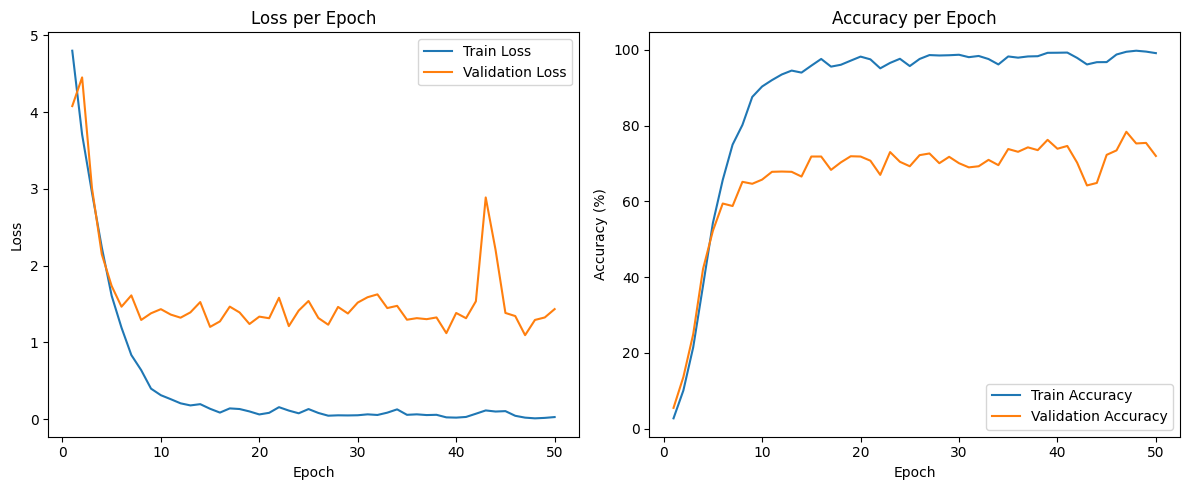

In [ ]:
# 학습과 검증의 손실과 정확도 시각화
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()